In [1]:
import os
from core.project import Project

## Create a new project from a empty or existing database

In [2]:
update_db = False
db_name = './new_db.db'
db_bkp = db_name.replace('.db', '')+'_bkp.db'
if os.path.exists(db_name) and not update_db:
    if os.path.exists(db_bkp):
        os.remove(db_bkp)
    os.rename(db_name, db_bkp)

In [3]:
p = Project.load(db_name)

In [4]:
bh_id = 'F212' 
x = 152567.
y = 122453.
z = 100.

In [5]:
p.insert_borehole({'id':bh_id, 'borehole_type': 'piezometer', 'length': 15, 'diameter':.1, 'top':{'middle': z, 'x': x, 'y': y}, 'base':{'middle': 90., 'x': x, 'y': y}})

Boreholes in the project :  0


In [6]:
intv_dict={'description': 'sable grossier à la base et plus fin vers le haut',
           'interval_number': 1,
           'top':{'middle': 100., 'x': x, 'y': y},
           'base':{'middle': 97., 'x': x, 'y': y},
           'components':["{'lithology': 'limon'}", "{'benzene_industrial': 'VS'}"],
           'extra_data': 'None'
          }

In [7]:
p.insert_interval_in_borehole(bh_id, intv_dict)

Boreholes in the project :  1


In [8]:
intv_dict={'description': 'sable fin à la base et plus argileux vers le haut',
           'interval_number': 2,
           'top':{'middle': 96., 'x': x, 'y': y},
           'base':{'middle': 91., 'x': x, 'y': y},
           'components':["{'lithology': 'argile'}", "{'benzene_industrial': 'VI'}"],
           'extra_data': 'None'
          }

In [9]:
p.insert_interval_in_borehole(bh_id, intv_dict)

Boreholes in the project :  1


In [10]:
p.refresh(update_3d=True)

/home/su530201/.local/share/virtualenvs/GSDMA-tJb-HgI6/lib/python3.8/site-packages/pyvista/core/dataset.py:1332: PyvistaDeprecationWarning: Use of `cell_arrays` is deprecated. Use `cell_data` instead.
  warnings.warn(


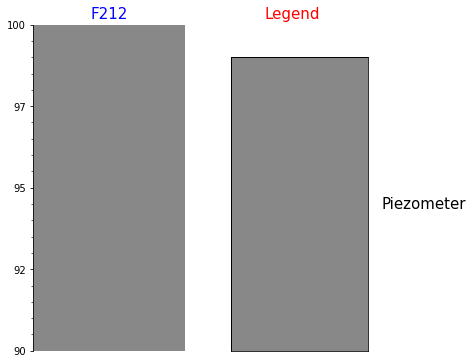

In [11]:
p.boreholes_3d[0].plot_log(repr_attribute=p.repr_attribute, width=0.5, ticks=(.5,2.5))

In [12]:
p.repr_attribute='benzene_industrial'

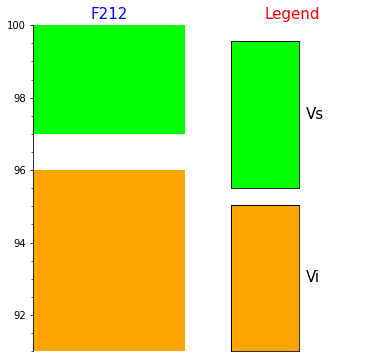

In [13]:
p.boreholes_3d[0].plot_log(repr_attribute=p.repr_attribute, ticks=(.5, 2))

In [14]:
p.plot3d(window_size=(800, 600), repr_attribute='borehole_type', str_annotations=False, verbose=True)

/home/su530201/.local/share/virtualenvs/GSDMA-tJb-HgI6/lib/python3.8/site-packages/pyvista/core/dataset.py:1332: PyvistaDeprecationWarning: Use of `cell_arrays` is deprecated. Use `cell_data` instead.
  warnings.warn(


Borehole "F212" | attribute values -> ['piezometer']


In [15]:
p.plot3d(window_size=(800, 600), repr_attribute='lithology', str_annotations=True, verbose=True)

Borehole "F212" | attribute values -> ['limon', 'argile']


In [16]:
p.plot3d(window_size=(800, 600), repr_attribute='benzene_industrial', str_annotations=True, verbose=True)

Borehole "F212" | attribute values -> ['VS', 'VI']


# Tests